<a href="https://colab.research.google.com/github/poojamahajan0712/EVA_Pooja/blob/master/S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S10 - Assignment 

Assignment: 

1.Pick your last code<br>
2.Make sure  to Add CutOut to your code. It should come from your transformations (albumentations)<br>
3.Use this repo: https://github.com/davidtvs/pytorch-lr-finder (Links to an external site.) 
    Move LR Finder code to your modules<br>
    Implement LR Finder (for SGD, not for ADAM)<br>
    Implement ReduceLROnPlatea: https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.ReduceLROnPlateau (Links to an external site.)<br>
4.Find best LR to train your model <br>
5.Use SDG with Momentum<br>
6.Train for 50 Epochs.<br>
7.Show Training and Test Accuracy curves<br>
8.Target 88% Accuracy.<br>
9.Run GradCAM on the any 25 misclassified images. Make sure you mention what is the prediction and what was the ground truth label.<br>
10.Submit


In [8]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from PIL import Image

#from transform_func import transform1
from data_load_cifar10 import dataload
from util import *
import resnet
from train_v1 import train
from test2 import test
from aug__new_albumv2 import album_train,album_test
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
#from utils import *
#from gradcam import GradCAM



  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-q6i2qrzx
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-q6i2qrzx
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=a36442a91d2c7ad6e957b14d400240f3e0803c4b2f6ac0fcf731106e3b5f09a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-i7dh8f3d/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [9]:

    
trainloader,testloader,classes =dataload(train_transform=album_train(),test_transorm=album_test())


Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



 deer horse  deer  bird


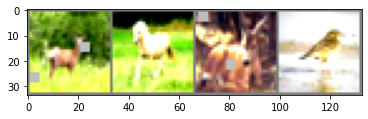

In [10]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4],padding=1))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [11]:

device = which_device()
net = resnet.ResNet18().to(device)
show_model_summary(net, device, (3,32,32))




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

 **Define a Loss function and optimizer** 


**Training and Testing**





In [12]:
import torch.nn as nn
from torch.optim import SGD,Adam
from torch_lr_finder import LRFinder

criterion = nn.CrossEntropyLoss()
optimizer=SGD(net.parameters(), lr=0.00001)
lr_finder=LRFinder(net,optimizer,criterion,device="cuda")
lr_finder.range_test(trainloader,end_lr=10,num_iter=500,step_mode="exp")


Learning rate search finished. See the graph with {finder_name}.plot()


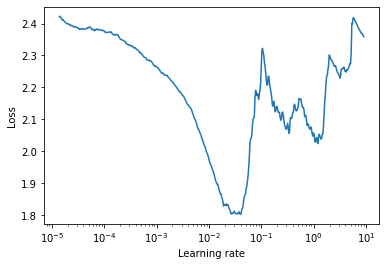

In [13]:
lr_finder.plot()

In [24]:


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.03, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, verbose=True)
def run():
  train_accs=[]
  test_losses=[]
  test_accs=[]
  for epoch in range(50):
      print("EPOCH:", epoch+1)
      
      train(net, device, trainloader, criterion, optimizer, epoch,train_accs)
      test(net, device, testloader, criterion, classes, test_losses, test_accs)
      scheduler.step(epoch)
  return(train_accs,test_accs)
 

train_accs,test_accs=run()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.31586629152297974 Batch_id=390 Accuracy=91.38: 100%|██████████| 391/391 [00:28<00:00, 13.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8269/10000 (82.69%)

EPOCH: 2


Loss=0.2866154909133911 Batch_id=390 Accuracy=92.20: 100%|██████████| 391/391 [00:28<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8354/10000 (83.54%)

EPOCH: 3


Loss=0.3067050576210022 Batch_id=390 Accuracy=93.38: 100%|██████████| 391/391 [00:28<00:00, 13.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8384/10000 (83.84%)

EPOCH: 4


Loss=0.18770185112953186 Batch_id=390 Accuracy=94.01: 100%|██████████| 391/391 [00:28<00:00, 13.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8404/10000 (84.04%)

EPOCH: 5


Loss=0.0596785768866539 Batch_id=390 Accuracy=94.41: 100%|██████████| 391/391 [00:28<00:00, 13.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 8332/10000 (83.32%)

EPOCH: 6


Loss=0.3333861231803894 Batch_id=390 Accuracy=95.10: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8430/10000 (84.30%)

EPOCH: 7


Loss=0.2621585726737976 Batch_id=390 Accuracy=95.87: 100%|██████████| 391/391 [00:28<00:00, 13.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8442/10000 (84.42%)

EPOCH: 8


Loss=0.18687239289283752 Batch_id=390 Accuracy=96.16: 100%|██████████| 391/391 [00:28<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 88 %
Accuracy of  bird : 72 %
Accuracy of   cat : 77 %
Accuracy of  deer : 90 %
Accuracy of   dog : 83 %
Accuracy of  frog : 87 %
Accuracy of horse : 97 %
Accuracy of  ship : 96 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0044, Accuracy: 8522/10000 (85.22%)

EPOCH: 9


Loss=0.1300828903913498 Batch_id=390 Accuracy=96.74: 100%|██████████| 391/391 [00:28<00:00, 13.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 8429/10000 (84.29%)

EPOCH: 10


Loss=0.06155640631914139 Batch_id=390 Accuracy=97.07: 100%|██████████| 391/391 [00:28<00:00, 13.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 8440/10000 (84.40%)

EPOCH: 11


Loss=0.10963156074285507 Batch_id=390 Accuracy=97.14: 100%|██████████| 391/391 [00:28<00:00, 13.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 97 %
Accuracy of  bird : 73 %
Accuracy of   cat : 75 %
Accuracy of  deer : 87 %
Accuracy of   dog : 90 %
Accuracy of  frog : 93 %
Accuracy of horse : 90 %
Accuracy of  ship : 96 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0044, Accuracy: 8561/10000 (85.61%)

EPOCH: 12


Loss=0.07837177813053131 Batch_id=390 Accuracy=97.61: 100%|██████████| 391/391 [00:28<00:00, 13.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 8439/10000 (84.39%)

Epoch    12: reducing learning rate of group 0 to 3.0000e-03.
EPOCH: 13


Loss=0.017212551087141037 Batch_id=390 Accuracy=98.84: 100%|██████████| 391/391 [00:28<00:00, 13.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 86 %
Accuracy of  bird : 73 %
Accuracy of   cat : 77 %
Accuracy of  deer : 85 %
Accuracy of   dog : 75 %
Accuracy of  frog : 86 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0041, Accuracy: 8754/10000 (87.54%)

EPOCH: 14


Loss=0.019433289766311646 Batch_id=390 Accuracy=99.39: 100%|██████████| 391/391 [00:28<00:00, 13.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 97 %
Accuracy of   car : 96 %
Accuracy of  bird : 81 %
Accuracy of   cat : 70 %
Accuracy of  deer : 90 %
Accuracy of   dog : 68 %
Accuracy of  frog : 89 %
Accuracy of horse : 93 %
Accuracy of  ship : 90 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0041, Accuracy: 8739/10000 (87.39%)

EPOCH: 15


Loss=0.07998065650463104 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [00:28<00:00, 13.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 92 %
Accuracy of  bird : 75 %
Accuracy of   cat : 68 %
Accuracy of  deer : 87 %
Accuracy of   dog : 75 %
Accuracy of  frog : 85 %
Accuracy of horse : 85 %
Accuracy of  ship : 89 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0041, Accuracy: 8752/10000 (87.52%)

EPOCH: 16


Loss=0.013028234243392944 Batch_id=390 Accuracy=99.59: 100%|██████████| 391/391 [00:28<00:00, 13.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 97 %
Accuracy of  bird : 75 %
Accuracy of   cat : 88 %
Accuracy of  deer : 96 %
Accuracy of   dog : 92 %
Accuracy of  frog : 90 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0041, Accuracy: 8724/10000 (87.24%)

EPOCH: 17


Loss=0.023809831589460373 Batch_id=390 Accuracy=99.62: 100%|██████████| 391/391 [00:28<00:00, 13.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 92 %
Accuracy of  bird : 71 %
Accuracy of   cat : 89 %
Accuracy of  deer : 81 %
Accuracy of   dog : 82 %
Accuracy of  frog : 100 %
Accuracy of horse : 82 %
Accuracy of  ship : 97 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0042, Accuracy: 8751/10000 (87.51%)

EPOCH: 18


Loss=0.0035065351985394955 Batch_id=390 Accuracy=99.72: 100%|██████████| 391/391 [00:28<00:00, 13.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 88 %
Accuracy of  bird : 85 %
Accuracy of   cat : 74 %
Accuracy of  deer : 87 %
Accuracy of   dog : 80 %
Accuracy of  frog : 93 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0041, Accuracy: 8761/10000 (87.61%)

EPOCH: 19


Loss=0.003617751644924283 Batch_id=390 Accuracy=99.72: 100%|██████████| 391/391 [00:28<00:00, 13.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 91 %
Accuracy of  bird : 88 %
Accuracy of   cat : 65 %
Accuracy of  deer : 90 %
Accuracy of   dog : 72 %
Accuracy of  frog : 90 %
Accuracy of horse : 88 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0041, Accuracy: 8764/10000 (87.64%)

EPOCH: 20


Loss=0.0071592750027775764 Batch_id=390 Accuracy=99.77: 100%|██████████| 391/391 [00:28<00:00, 13.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 89 %
Accuracy of  bird : 61 %
Accuracy of   cat : 80 %
Accuracy of  deer : 91 %
Accuracy of   dog : 65 %
Accuracy of  frog : 87 %
Accuracy of horse : 91 %
Accuracy of  ship : 89 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0042, Accuracy: 8757/10000 (87.57%)

EPOCH: 21


Loss=0.0038599788676947355 Batch_id=390 Accuracy=99.76: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 97 %
Accuracy of  bird : 80 %
Accuracy of   cat : 86 %
Accuracy of  deer : 78 %
Accuracy of   dog : 82 %
Accuracy of  frog : 89 %
Accuracy of horse : 88 %
Accuracy of  ship : 91 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0041, Accuracy: 8765/10000 (87.65%)

EPOCH: 22


Loss=0.013964688405394554 Batch_id=390 Accuracy=99.80: 100%|██████████| 391/391 [00:28<00:00, 13.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 83 %
Accuracy of  bird : 83 %
Accuracy of   cat : 53 %
Accuracy of  deer : 83 %
Accuracy of   dog : 88 %
Accuracy of  frog : 93 %
Accuracy of horse : 87 %
Accuracy of  ship : 100 %
Accuracy of truck : 80 %

Test set: Average loss: 0.0041, Accuracy: 8773/10000 (87.73%)

EPOCH: 23


Loss=0.005846506450325251 Batch_id=390 Accuracy=99.78: 100%|██████████| 391/391 [00:28<00:00, 13.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 97 %
Accuracy of  bird : 85 %
Accuracy of   cat : 79 %
Accuracy of  deer : 78 %
Accuracy of   dog : 82 %
Accuracy of  frog : 82 %
Accuracy of horse : 85 %
Accuracy of  ship : 92 %
Accuracy of truck : 84 %

Test set: Average loss: 0.0042, Accuracy: 8764/10000 (87.64%)

Epoch    23: reducing learning rate of group 0 to 3.0000e-04.
EPOCH: 24


Loss=0.004009204916656017 Batch_id=390 Accuracy=99.80: 100%|██████████| 391/391 [00:28<00:00, 13.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 96 %
Accuracy of  bird : 86 %
Accuracy of   cat : 75 %
Accuracy of  deer : 85 %
Accuracy of   dog : 72 %
Accuracy of  frog : 82 %
Accuracy of horse : 95 %
Accuracy of  ship : 90 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0042, Accuracy: 8774/10000 (87.74%)

EPOCH: 25


Loss=0.019450444728136063 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:28<00:00, 13.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 82 %
Accuracy of   car : 85 %
Accuracy of  bird : 86 %
Accuracy of   cat : 89 %
Accuracy of  deer : 89 %
Accuracy of   dog : 86 %
Accuracy of  frog : 90 %
Accuracy of horse : 82 %
Accuracy of  ship : 88 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0042, Accuracy: 8768/10000 (87.68%)

EPOCH: 26


Loss=0.008219254203140736 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:28<00:00, 13.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 88 %
Accuracy of  bird : 81 %
Accuracy of   cat : 68 %
Accuracy of  deer : 89 %
Accuracy of   dog : 85 %
Accuracy of  frog : 90 %
Accuracy of horse : 93 %
Accuracy of  ship : 82 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0041, Accuracy: 8784/10000 (87.84%)

EPOCH: 27


Loss=0.00935441255569458 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:28<00:00, 13.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 91 %
Accuracy of  bird : 92 %
Accuracy of   cat : 87 %
Accuracy of  deer : 90 %
Accuracy of   dog : 76 %
Accuracy of  frog : 83 %
Accuracy of horse : 95 %
Accuracy of  ship : 86 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0042, Accuracy: 8781/10000 (87.81%)

EPOCH: 28


Loss=0.07669465988874435 Batch_id=390 Accuracy=99.83: 100%|██████████| 391/391 [00:28<00:00, 13.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 94 %
Accuracy of  bird : 82 %
Accuracy of   cat : 58 %
Accuracy of  deer : 94 %
Accuracy of   dog : 75 %
Accuracy of  frog : 90 %
Accuracy of horse : 80 %
Accuracy of  ship : 81 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0042, Accuracy: 8784/10000 (87.84%)

EPOCH: 29


Loss=0.004086869768798351 Batch_id=390 Accuracy=99.86: 100%|██████████| 391/391 [00:28<00:00, 13.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 94 %
Accuracy of  bird : 86 %
Accuracy of   cat : 83 %
Accuracy of  deer : 77 %
Accuracy of   dog : 75 %
Accuracy of  frog : 92 %
Accuracy of horse : 84 %
Accuracy of  ship : 93 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0043, Accuracy: 8773/10000 (87.73%)

EPOCH: 30


Loss=0.003830772591754794 Batch_id=390 Accuracy=99.83: 100%|██████████| 391/391 [00:28<00:00, 13.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 100 %
Accuracy of  bird : 83 %
Accuracy of   cat : 72 %
Accuracy of  deer : 81 %
Accuracy of   dog : 81 %
Accuracy of  frog : 87 %
Accuracy of horse : 95 %
Accuracy of  ship : 88 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0042, Accuracy: 8778/10000 (87.78%)

EPOCH: 31


Loss=0.0014819980133324862 Batch_id=390 Accuracy=99.82: 100%|██████████| 391/391 [00:28<00:00, 13.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 88 %
Accuracy of  bird : 74 %
Accuracy of   cat : 84 %
Accuracy of  deer : 89 %
Accuracy of   dog : 82 %
Accuracy of  frog : 92 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0041, Accuracy: 8782/10000 (87.82%)

EPOCH: 32


Loss=0.00490150460973382 Batch_id=390 Accuracy=99.85: 100%|██████████| 391/391 [00:28<00:00, 13.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 91 %
Accuracy of  bird : 86 %
Accuracy of   cat : 61 %
Accuracy of  deer : 75 %
Accuracy of   dog : 91 %
Accuracy of  frog : 93 %
Accuracy of horse : 88 %
Accuracy of  ship : 88 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0042, Accuracy: 8788/10000 (87.88%)

EPOCH: 33


Loss=0.002160996198654175 Batch_id=390 Accuracy=99.80: 100%|██████████| 391/391 [00:29<00:00, 13.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 84 %
Accuracy of   car : 89 %
Accuracy of  bird : 80 %
Accuracy of   cat : 81 %
Accuracy of  deer : 93 %
Accuracy of   dog : 75 %
Accuracy of  frog : 87 %
Accuracy of horse : 87 %
Accuracy of  ship : 85 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0042, Accuracy: 8780/10000 (87.80%)

EPOCH: 34


Loss=0.012547862716019154 Batch_id=390 Accuracy=99.82: 100%|██████████| 391/391 [00:29<00:00, 13.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 84 %
Accuracy of   car : 90 %
Accuracy of  bird : 84 %
Accuracy of   cat : 71 %
Accuracy of  deer : 93 %
Accuracy of   dog : 96 %
Accuracy of  frog : 89 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0041, Accuracy: 8786/10000 (87.86%)

Epoch    34: reducing learning rate of group 0 to 3.0000e-05.
EPOCH: 35


Loss=0.0031666397117078304 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 96 %
Accuracy of  bird : 87 %
Accuracy of   cat : 73 %
Accuracy of  deer : 84 %
Accuracy of   dog : 73 %
Accuracy of  frog : 87 %
Accuracy of horse : 86 %
Accuracy of  ship : 96 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0043, Accuracy: 8773/10000 (87.73%)

EPOCH: 36


Loss=0.01464756764471531 Batch_id=390 Accuracy=99.82: 100%|██████████| 391/391 [00:29<00:00, 13.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 80 %
Accuracy of   car : 96 %
Accuracy of  bird : 76 %
Accuracy of   cat : 77 %
Accuracy of  deer : 89 %
Accuracy of   dog : 84 %
Accuracy of  frog : 92 %
Accuracy of horse : 100 %
Accuracy of  ship : 96 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0043, Accuracy: 8776/10000 (87.76%)

EPOCH: 37


Loss=0.001885747886262834 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:28<00:00, 13.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 86 %
Accuracy of   cat : 82 %
Accuracy of  deer : 87 %
Accuracy of   dog : 87 %
Accuracy of  frog : 89 %
Accuracy of horse : 88 %
Accuracy of  ship : 90 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0042, Accuracy: 8783/10000 (87.83%)

EPOCH: 38


Loss=0.012301141396164894 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:29<00:00, 13.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 94 %
Accuracy of  bird : 100 %
Accuracy of   cat : 69 %
Accuracy of  deer : 80 %
Accuracy of   dog : 74 %
Accuracy of  frog : 92 %
Accuracy of horse : 96 %
Accuracy of  ship : 89 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0042, Accuracy: 8780/10000 (87.80%)

EPOCH: 39


Loss=0.003858256386592984 Batch_id=390 Accuracy=99.86: 100%|██████████| 391/391 [00:29<00:00, 13.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 76 %
Accuracy of  deer : 81 %
Accuracy of   dog : 78 %
Accuracy of  frog : 93 %
Accuracy of horse : 96 %
Accuracy of  ship : 92 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0042, Accuracy: 8782/10000 (87.82%)

EPOCH: 40


Loss=0.00465282192453742 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:29<00:00, 13.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 91 %
Accuracy of  bird : 96 %
Accuracy of   cat : 69 %
Accuracy of  deer : 90 %
Accuracy of   dog : 86 %
Accuracy of  frog : 92 %
Accuracy of horse : 94 %
Accuracy of  ship : 91 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0041, Accuracy: 8793/10000 (87.93%)

EPOCH: 41


Loss=0.03126051276922226 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:28<00:00, 13.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 84 %
Accuracy of   car : 93 %
Accuracy of  bird : 88 %
Accuracy of   cat : 85 %
Accuracy of  deer : 87 %
Accuracy of   dog : 79 %
Accuracy of  frog : 88 %
Accuracy of horse : 93 %
Accuracy of  ship : 100 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0042, Accuracy: 8781/10000 (87.81%)

EPOCH: 42


Loss=0.024896657094359398 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:28<00:00, 13.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 87 %
Accuracy of  bird : 97 %
Accuracy of   cat : 66 %
Accuracy of  deer : 93 %
Accuracy of   dog : 73 %
Accuracy of  frog : 88 %
Accuracy of horse : 96 %
Accuracy of  ship : 87 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0042, Accuracy: 8791/10000 (87.91%)

EPOCH: 43


Loss=0.0018858552211895585 Batch_id=390 Accuracy=99.82: 100%|██████████| 391/391 [00:28<00:00, 13.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 90 %
Accuracy of  bird : 76 %
Accuracy of   cat : 83 %
Accuracy of  deer : 82 %
Accuracy of   dog : 87 %
Accuracy of  frog : 100 %
Accuracy of horse : 86 %
Accuracy of  ship : 94 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0042, Accuracy: 8781/10000 (87.81%)

EPOCH: 44


Loss=0.014361786656081676 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:28<00:00, 13.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 80 %
Accuracy of   car : 97 %
Accuracy of  bird : 86 %
Accuracy of   cat : 74 %
Accuracy of  deer : 77 %
Accuracy of   dog : 74 %
Accuracy of  frog : 91 %
Accuracy of horse : 92 %
Accuracy of  ship : 92 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0041, Accuracy: 8786/10000 (87.86%)

EPOCH: 45


Loss=0.013307088986039162 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:28<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 93 %
Accuracy of  bird : 88 %
Accuracy of   cat : 68 %
Accuracy of  deer : 96 %
Accuracy of   dog : 68 %
Accuracy of  frog : 93 %
Accuracy of horse : 93 %
Accuracy of  ship : 93 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0042, Accuracy: 8777/10000 (87.77%)

Epoch    45: reducing learning rate of group 0 to 3.0000e-06.
EPOCH: 46


Loss=0.00958511233329773 Batch_id=390 Accuracy=99.82: 100%|██████████| 391/391 [00:28<00:00, 13.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 97 %
Accuracy of   car : 96 %
Accuracy of  bird : 80 %
Accuracy of   cat : 73 %
Accuracy of  deer : 82 %
Accuracy of   dog : 91 %
Accuracy of  frog : 82 %
Accuracy of horse : 92 %
Accuracy of  ship : 91 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0042, Accuracy: 8784/10000 (87.84%)

EPOCH: 47


Loss=0.0025890707038342953 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:28<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 90 %
Accuracy of  bird : 93 %
Accuracy of   cat : 87 %
Accuracy of  deer : 90 %
Accuracy of   dog : 86 %
Accuracy of  frog : 88 %
Accuracy of horse : 92 %
Accuracy of  ship : 92 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0042, Accuracy: 8776/10000 (87.76%)

EPOCH: 48


Loss=0.0025697529781609774 Batch_id=390 Accuracy=99.86: 100%|██████████| 391/391 [00:28<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 92 %
Accuracy of  bird : 83 %
Accuracy of   cat : 83 %
Accuracy of  deer : 82 %
Accuracy of   dog : 84 %
Accuracy of  frog : 76 %
Accuracy of horse : 92 %
Accuracy of  ship : 94 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0042, Accuracy: 8784/10000 (87.84%)

EPOCH: 49


Loss=0.017338460311293602 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:28<00:00, 13.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Accuracy of plane : 82 %
Accuracy of   car : 93 %
Accuracy of  bird : 79 %
Accuracy of   cat : 75 %
Accuracy of  deer : 84 %
Accuracy of   dog : 70 %
Accuracy of  frog : 100 %
Accuracy of horse : 93 %
Accuracy of  ship : 100 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0042, Accuracy: 8785/10000 (87.85%)

EPOCH: 50


Loss=0.0074221729300916195 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:28<00:00, 13.53it/s]



Accuracy of plane : 96 %
Accuracy of   car : 92 %
Accuracy of  bird : 81 %
Accuracy of   cat : 73 %
Accuracy of  deer : 87 %
Accuracy of   dog : 75 %
Accuracy of  frog : 91 %
Accuracy of horse : 86 %
Accuracy of  ship : 93 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0042, Accuracy: 8773/10000 (87.73%)



'extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())\nfig.savefig(\'Accuracy_S6.png\', bbox_inches=extent.expanded(1.1, 1.2))\nfiles.download("Accuracy_S6.png") '

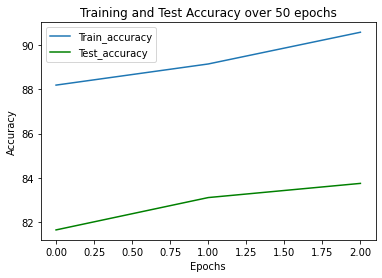

In [23]:
from google.colab import files


plt.plot(train_accs[:], label="Train_accuracy")
plt.plot(test_accs[:], color="green", label="Test_accuracy")
plt.title("Training and Test Accuracy over 50 epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

'''extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('Accuracy_S6.png', bbox_inches=extent.expanded(1.1, 1.2))
files.download("Accuracy_S6.png") '''


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  horse  frog   car  ship


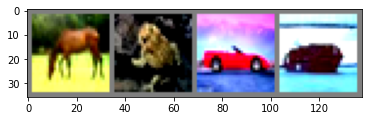

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
model_dict = dict(type='resnet', arch=net, layer_name='layer4', input_size=(32,32))
gradcam = GradCAM(model_dict)
# get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
p=images[:1]
#print(p.shape)

torch_img = torch.from_numpy(np.asarray(p)).permute(0, 3, 1, 2).reshape(3, 32, 32).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)

normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
normed_img = normalizer(torch_img)

#print(type(normed_img))

# get a GradCAM saliency map on the class index 10.
mask, logit = gradcam(normed_img, class_idx=1)

# make heatmap from mask and synthesize saliency map using heatmap and img
heatmap, cam_result = visualize_cam(mask, torch_img)

torch.Size([1, 3, 32, 32])
<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


TypeError: ignored

Okay, now let us see what the neural network thinks these examples above are:
The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:


In [0]:
images=images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.

